<a href="https://colab.research.google.com/github/samibahig/RecoverProject/blob/main/PLS_DA_Metabolomique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
import sklearn
import os
plt.style.use('ggplot')
#print('\nMETADATA :')
data_path = ''
metadata_filename = data_path + '/content/metadata.csv'
meta_df = pd.read_csv(metadata_filename)
#print(meta_df.columns)
meta_df.columns = ['#', 'plate', '-', 'symptoms'] + list(meta_df)[4:]
#print(meta_df.columns)
#print('available metadata :', list(meta_df))
meta_idx = meta_df['ID'].to_list()
meta_label = meta_df['symptoms'].to_list()
#print('------------------')
#print(list(zip(meta_idx, meta_label)))
#print('------------------')
meta_id_label_dict = {str(k): 1 if v=='S' else 0 for k, v in zip(meta_idx, meta_label)}


data_path = ''
print('\nMETABOLOMICS DATA :')
metabolomics_data_filename = data_path + '/content/metabolomics.csv'
feat_df = pd.read_csv(metabolomics_data_filename, index_col=0, skiprows=[0], dtype=str, usecols=[0])
features = list(feat_df.index.values)
print('# of features : ', len(features))
print('first feature :', features[0])
print('last feature :', features[-1])
col_list = ["Group"]
column1 = pd.read_csv(metabolomics_data_filename, usecols=col_list)
print('----------')
column1 = column1['Group'].to_list()
print(column1[1:])

print('----------')
idx_df = pd.read_csv(metabolomics_data_filename, header=1, nrows=1, encoding='unicode_escape')
print(idx_df)
idx = list(idx_df)[1:]
idx = [l[17:22] for l in idx]
labels_df = pd.read_csv(metabolomics_data_filename, nrows=1)
labels = list(labels_df)[1:]
print('# of labels : ', len(labels))

cols_df = pd.read_csv(metabolomics_data_filename, header=1, nrows=1, encoding='unicode_escape')
cols_list = list(cols_df)

df3 = pd.read_csv(metabolomics_data_filename, header=1, na_values=['#DIV/0!'], usecols=cols_list[1:], encoding='unicode_escape')
df3 = df3.T
df3['idx'] = idx
df3.set_index('idx', inplace=True)
df3.columns = features
df3 = df3.dropna(axis=1)

#clean data of samples that are not in metadata :
idx = df3.index.values
y = []
for k in range(len(idx)):
    id = idx[k]
    if id in meta_id_label_dict:
        y.append(meta_id_label_dict[id])
    else:
        # we will not put this sample in the dataset
        #print('sample to remove because of unknown label:', k, id)
        y.append('to_remove')
df3['label'] = y
df3 = df3[df3.label != 'to_remove']

#create X and y matrices for ML :
y = list(df3['label'])
print(y)
del df3['label']
X = df3.to_numpy()

print('metabolomics data :')
print('# of samples : ', df3.shape[0])
print('# of features : ', df3.shape[1])
print('labels:', list(dict.fromkeys(y)))

## to concatenate the 2 proteomics dataframes and the metabolomics if you want :
##df = pd.concat([df_1_2, df3], axis=1)
##df = df.dropna(axis=0)
##print('multi-omics df :')
##print('# of samples : ', df.shape[0])
##print('# of features : ', df.shape[1])


METABOLOMICS DATA :
# of features :  4068
first feature : 3.15_160.1695m/z
last feature : 7.71_483.0063m/z
----------
['3.15_160.1695m/z', '8.56_366.6297m/z', '6.52_828.4067n', '7.23_281.0516m/z', '8.34_429.0893m/z', '4.55_252.0298m/z', '4.56_234.0194m/z', '4.55_220.0590m/z', '5.19_386.0794m/z', '8.56_367.6297m/z', '4.55_337.0498n', '7.68_358.3671m/z', '5.07_371.2588m/z', '5.87_393.0866m/z', '8.34_485.1126m/z', '8.34_445.1197m/z', '4.04_133.0143m/z', '7.68_355.0720m/z', '8.87_519.1391m/z', '4.54_352.0727m/z', '8.34_248.0596m/z', '8.34_355.0706m/z', '5.19_370.2564m/z', '4.78_354.0894m/z', '7.68_371.1045m/z', '9.58_445.1201m/z', '7.68_281.0517m/z', '8.34_281.0516m/z', '8.34_371.1021m/z', '3.24_268.0614m/z', '5.28_429.2386m/z', '7.68_248.0590m/z', '4.04_151.0293m/z', '4.08_284.0562m/z', '8.87_206.0254n', '8.38_207.0326m/z', '6.52_414.2042n', '8.34_223.0674m/z', '4.60_368.0878m/z', '8.87_559.1315m/z', '7.68_190.0325n', '7.68_411.1100m/z', '6.52_119.0859m/z', '5.87_449.1529m/z', '8.87_355.

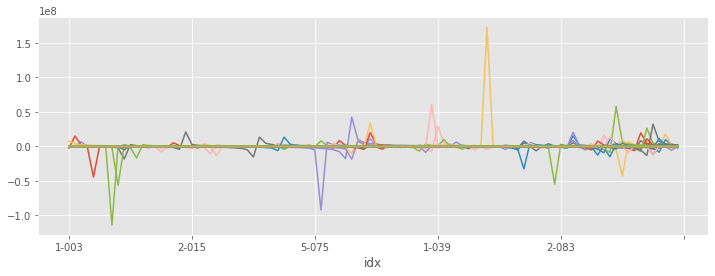

In [16]:
df3.plot(kind='line',legend=False, figsize=(12,4))

In [18]:
y

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [21]:
from sklearn.cross_decomposition import PLSRegression
plsr = PLSRegression(n_components=2, scale=False)
plsr.fit(X, y)

PLSRegression(copy=True, max_iter=500, n_components=2, scale=False, tol=1e-06)

In [22]:
plsr.x_scores_

array([[-1.44205186e+06,  8.53070862e+05],
       [-2.34201557e+06,  2.58815791e+06],
       [-1.47320804e+06,  8.89805141e+05],
       [-1.34792241e+06,  6.03410862e+05],
       [-7.60710292e+06,  1.21947781e+07],
       [-1.03944132e+06, -5.51588312e+04],
       [-1.28519105e+06,  2.43652456e+05],
       [-4.48694398e+07,  4.07466889e+07],
       [-1.12452049e+07,  1.79930430e+07],
       [-1.51794037e+06,  1.19495341e+06],
       [-5.65003027e+05, -6.66329028e+05],
       [-1.48333998e+06,  1.06850539e+06],
       [-5.40600114e+05, -7.90431027e+05],
       [-6.72335758e+05, -5.47785602e+05],
       [-6.78770728e+05, -5.58738663e+05],
       [-9.37470030e+05, -4.06169250e+04],
       [-7.00745899e+05, -5.38681694e+05],
       [-7.92988553e+05, -3.60505962e+05],
       [-5.86658278e+05, -7.76511329e+05],
       [-2.11264413e+06,  2.27307298e+06],
       [-1.08107038e+06,  1.98562472e+05],
       [-9.75645073e+05, -1.50255770e+04],
       [-9.93410791e+05,  1.04698378e+04],
       [-1.

In [23]:
plsr.x_weights_.shape

(3989, 2)

In [31]:
scores = pd.DataFrame(plsr.x_scores_)

In [25]:
#scores.index=df.columns

NameError: ignored

Text(0, 0.5, 'Scores on LV 2')

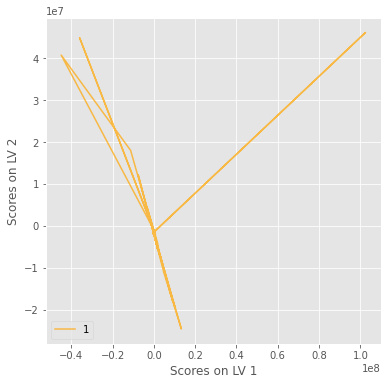

In [56]:
scores = pd.DataFrame(plsr.x_scores_)
ax = scores.plot(x=0, y=1, color='orange', alpha=0.7, figsize=(6,6))
ax.set_xlabel('Scores on LV 1')
ax.set_ylabel('Scores on LV 2')                                                                  

Text(0, 0.5, 'Scores on LV 2')

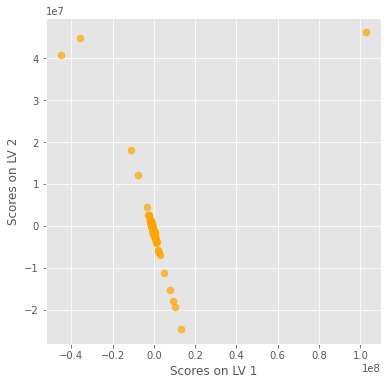

In [62]:
scores = pd.DataFrame(plsr.x_scores_)
ax = scores.plot(x=0, y=1, kind='scatter', s=50, color='orange',  alpha=0.7, figsize=(6,6))
ax.set_xlabel('Scores on LV 1')
ax.set_ylabel('Scores on LV 2')     